In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from collections import Counter
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline






In [2]:
df=pd.read_csv("Data/train.csv")
df.drop(['policy_id','area_cluster','length','width','height','gross_weight','displacement','turning_radius','is_front_fog_lights','is_rear_window_wiper'], axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,quote_random
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,2724
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,3867
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,Yes,No,No,No,Yes,0,0,3882
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,2858
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,3220


In [3]:
df.nunique()

policy_tenure                       58591
age_of_car                             49
age_of_policyholder                    75
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                           3
is_rear_window_washer                   2
is_rear_window_defogger           

In [4]:
claims=Counter(df['is_claim'])
print(
    "Fraction of low-risk customers = {0:.1%}".format(
        claims[0] / (claims[0]+claims[1]))
    )
print(
    "Fraction of high risk customers = {0:.1%}".format(
        claims[1] / (claims[0]+claims[1]))
    )

Fraction of low-risk customers = 93.6%
Fraction of high risk customers = 6.4%


In [5]:
print(
    "Average Frequency of high risk= {}".format(np.average(df["is_claim"]))
)

Average Frequency of high risk= 0.06396777717094485


In [6]:
column_list = list(df.select_dtypes(include=['O']).columns)
column_list

['segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [7]:
import re
binary_cols=[cols for cols in column_list if re.search(r'^is_',cols)]
binary_cols

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [8]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in binary_cols:
    df[x] = le.fit_transform(df[x])
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,quote_random
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,1,0,0,0,1,0,0,2724
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,1,0,0,0,1,0,0,3867
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,1,0,0,0,1,0,0,3882
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,1,1,1,1,1,1,1,2,0,2858
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,1,1,1,0,1,1,1,2,0,3220


<AxesSubplot: title={'center': 'Elbow Curve'}, xlabel='k'>

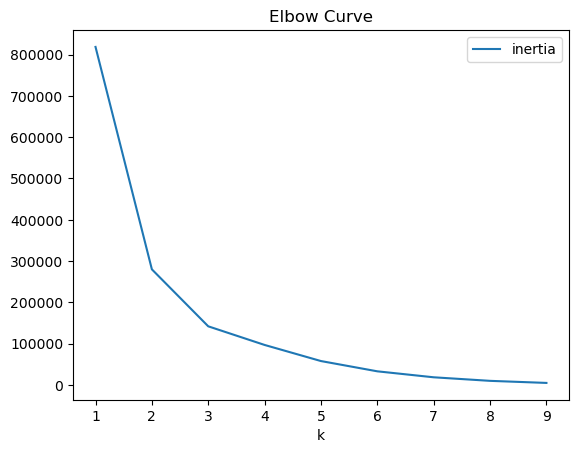

In [9]:
features=['model','segment','make']
for x in features:
    df[x] = le.fit_transform(df[x])
inertia=[]
k=list(range(1,10))
#Looking for best value of k
for i in k:
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df[features])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)


In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[features])
df['car_features'] = kmeans.predict(df[features])
df['car_features']
df.drop(features,axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,quote_random,car_features
0,0.515874,0.05,0.644231,4990,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,1,0,0,0,1,0,0,2724,2
1,0.672619,0.02,0.375000,27003,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,1,0,0,0,1,0,0,3867,2
2,0.841110,0.02,0.384615,4076,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,1,0,0,0,1,0,0,3882,2
3,0.900277,0.11,0.432692,21622,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,...,1,1,1,1,1,1,2,0,2858,0
4,0.596403,0.11,0.634615,34738,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,...,1,1,0,1,1,1,2,0,3220,2


We are performing same steps of clustering as above.Here we are clustering car engine features like torque,power and engine type.

<AxesSubplot: title={'center': 'Elbow Curve'}, xlabel='k'>

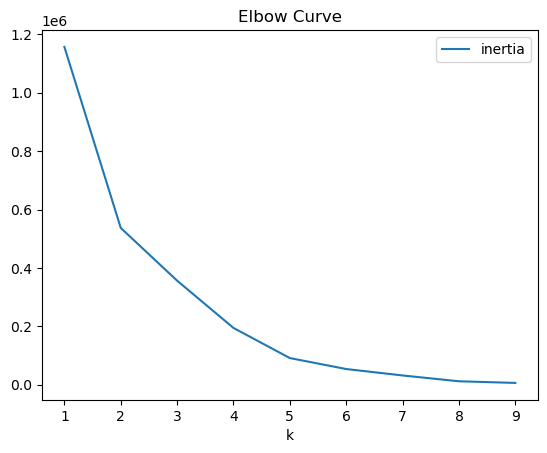

In [11]:
features=['max_torque','max_power','engine_type']
for x in features:
    df[x] = le.fit_transform(df[x])
inertia=[]
k=list(range(1,10))
#Looking for best value of k
for i in k:
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df[features])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[features])
df['power_range'] = kmeans.predict(df[features])
df['power_range']
df.drop(features,axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,quote_random,car_features,power_range
0,0.515874,0.05,0.644231,4990,CNG,2,0,0,0,1,...,1,0,0,0,1,0,0,2724,2,2
1,0.672619,0.02,0.375000,27003,CNG,2,0,0,0,1,...,1,0,0,0,1,0,0,3867,2,2
2,0.841110,0.02,0.384615,4076,CNG,2,0,0,0,1,...,1,0,0,0,1,0,0,3882,2,2
3,0.900277,0.11,0.432692,21622,Petrol,2,1,1,0,1,...,1,1,1,1,1,2,0,2858,0,3
4,0.596403,0.11,0.634615,34738,Petrol,2,0,0,0,0,...,1,0,1,1,1,2,0,3220,2,4


In [13]:
ohe_cols=list(df.select_dtypes(include=['O']).columns)
ohe_cols

['fuel_type', 'rear_brakes_type', 'transmission_type', 'steering_type']

In [14]:
ohe_df=pd.get_dummies(df[ohe_cols])
df=pd.concat([df, ohe_df], axis=1)
df=df.drop(columns=ohe_cols)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,0.672619,0.02,0.375000,27003,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0.841110,0.02,0.384615,4076,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,0.900277,0.11,0.432692,21622,2,1,1,0,1,1,...,0,0,1,0,1,1,0,1,0,0
4,0.596403,0.11,0.634615,34738,2,0,0,0,0,1,...,0,0,1,0,1,1,0,1,0,0


In [15]:
# computing number of rows
rows = len(df.axes[0])
# computing number of columns
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  58592
Number of Columns:  37


In [16]:
# Create our features
X=df.drop('is_claim',axis=1)
# Create our target
y = df['is_claim']

In [17]:
Counter(y)

Counter({0: 54844, 1: 3748})

OverSampling

In [18]:
from imblearn.over_sampling import ADASYN
X_sampled,y_sampled=ADASYN().fit_resample(X,y)

In [19]:
from imblearn.under_sampling import RandomUnderSampler
X_sampled,y_sampled=RandomUnderSampler().fit_resample(X,y)

In [20]:
# Resample the training data with the RandomOversampler

from imblearn.over_sampling import RandomOverSampler
X_sampled,y_sampled=RandomOverSampler().fit_resample(X,y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled)
std_scaler=StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train)
X_test_scaled=std_scaler.fit_transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight="balanced",max_iter=800,verbose=11)
model.fit(X_train_scaled, y_train)
# Predicting the Target variable
y_pred = model.predict(X_test_scaled)
accuracy = model.score(X_test_scaled, y_test)
print(classification_report(y_test, y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           37     M =           10

 L =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00

X0 =  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00  0.0000D+00
      0.0000D+00  0.

      1.3994D+00 -1.8330D+00  1.8330D+00  2.6130D+00 -1.5260D+00 -2.1619D+00
      1.3518D-02


ITERATION    18

----------------SUBSM entered-----------------


----------------exit SUBSM --------------------

 LINE SEARCH           1  times; norm of step =    1.6461452927701381E-004

At iterate   18    f=  5.54712D+04    |proj g|=  1.39042D+00

 X =  3.5061D-01 -2.1210D-01  3.1255D-02 -5.1361D-02 -2.0453D-02  1.6358D-02
      2.4556D-02  9.0030D-04  3.2265D-02 -2.1372D-02  2.1497D-02 -3.6240D-03
     -2.1544D-02 -9.0546D-03  2.2865D-02 -1.6109D-02 -1.6109D-02  1.1337D-02
     -1.1296D-03 -1.0456D-02 -1.6109D-02  2.6893D-02  6.0530D-03  3.4189D-02
     -3.1014D-02  2.3040D-02 -8.2549D-03 -2.1109D-03  1.0198D-02  9.0030D-04
     -9.0030D-04  7.2326D-03 -7.2326D-03  1.1098D-02 -1.1337D-02 -7.7985D-03
     -1.4067D-03

 G = -7.5605D-01 -8.1546D-02  3.5820D-01 -3.7053D-02 -1.0219D-01 -2.9793D-01
      1.1293D-01  3.9490D-01  5.4006D-01 -2.4117D-01 -1.3488D-01  4.2227D-01
     -1.6931D-01 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s finished


In [28]:
# Display the confusion matrix
cc_cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cc_cm_df = pd.DataFrame(cc_cm, index=["Actual high risk", "Actual low risk"], columns=["Predicted high risk", "Predicted low risk"])

cc_cm_df

,Predicted high risk,Predicted low risk
Actual high risk,7717,5922
Actual low risk,5519,8264


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.609


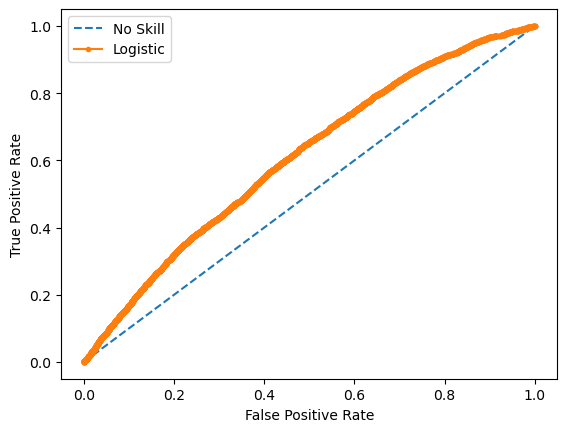

In [23]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.616


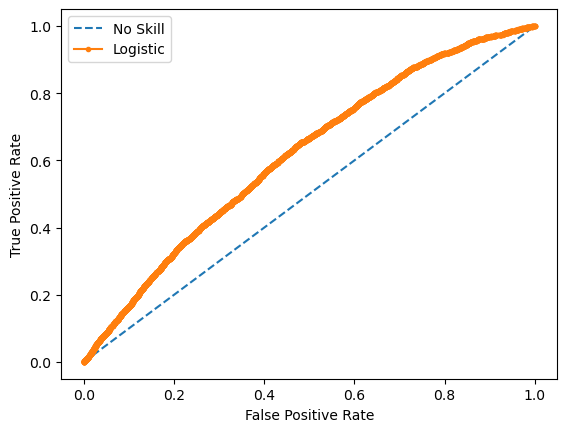

In [24]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test_scaled)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [29]:

dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
# 


              precision    recall  f1-score   support

           0       0.84      0.92      0.88     13639
           1       0.91      0.82      0.86     13783

    accuracy                           0.87     27422
   macro avg       0.87      0.87      0.87     27422
weighted avg       0.87      0.87      0.87     27422



In [31]:
# Display the confusion matrix
cc_cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cc_cm_df = pd.DataFrame(cc_cm, index=["Actual high risk", "Actual low risk"], columns=["Predicted high risk", "Predicted low risk"])

cc_cm_df

,Predicted high risk,Predicted low risk
Actual high risk,12496,1143
Actual low risk,2423,11360


In [32]:
model = DecisionTreeRegressor()
regr_trans = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))
regr_trans.fit(X_train, y_train)
y_pred = regr_trans.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.92      0.96     13639
           1       0.92      1.00      0.96     13783

    accuracy                           0.96     27422
   macro avg       0.96      0.96      0.96     27422
weighted avg       0.96      0.96      0.96     27422



In [33]:
# Display the confusion matrix
cc_cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cc_cm_df = pd.DataFrame(cc_cm, index=["Actual high risk", "Actual low risk"], columns=["Predicted high risk", "Predicted low risk"])

cc_cm_df

,Predicted high risk,Predicted low risk
Actual high risk,12505,1134
Actual low risk,0,13783
